# Estimator in Extreme Value Theory

This notebook calculates Extreme Value Estimators based on 100m Data from 2008 to 2020 achieved by Women or Men depending on your choice of gender. The following estimator are calculated:

- Moment Estimator
- Hill Estimator
- Pickands Estimator


## Data Preparation

In [1]:
import pandas as pd
from numpy import log
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#  gender = "men"
gender = "women"
df = pd.read_csv(f"data/csv-files/100m_{gender}_filtered.csv")
df.head()

,Mark,WIND,Competitor,Nat,Venue,Date,Speed
0,10.6400,1.2,Carmelita JETER,USA,Shanghai (CHN),2009-09-20,33.834586
1,10.6975,0.6,Shelly-Ann FRASER-PRYCE,JAM,Kingston (JAM),2012-06-29,33.652723
2,10.7025,0.3,Elaine THOMPSON,JAM,Kingston (JAM),2016-07-01,33.637001
3,10.7400,1.0,English GARDNER,USA,"Hayward Field, Eugene, OR (USA)",2016-07-03,33.519553
4,10.7475,0.4,Kerron STEWART,JAM,"Stadio Olimpico, Roma (ITA)",2009-07-10,33.496162


In [3]:
# get the personal bests of all competitors over the years and sort them from lowest to largest
personal_bests = df.Speed.sort_values().to_numpy()

# statistical sample set
X = personal_bests
n = len(X)

## Moment Estimator

In [4]:
def m_n(r: int, k: int, X: np.array) -> float:
    """Calculates result of helper functions of the moment estimator"""
    return 1/(k) * sum([(log(X[(n-1)-i]) - log(X[(n-1)-k]))**r for i in range(0, k)])
                      

def moment_estimator(k: int, X: np.array) -> float:
    """Returns result of the moment estimator"""
    return m_n(1, k, X) + 1 - 1/2*(1- (m_n(1, k, X)**2)/m_n(2, k, X))**(-1)

In [5]:
# calculate all estimator for all k from 2, n-1
moment_estimators = [moment_estimator(k, X) for k in range(2, n)]

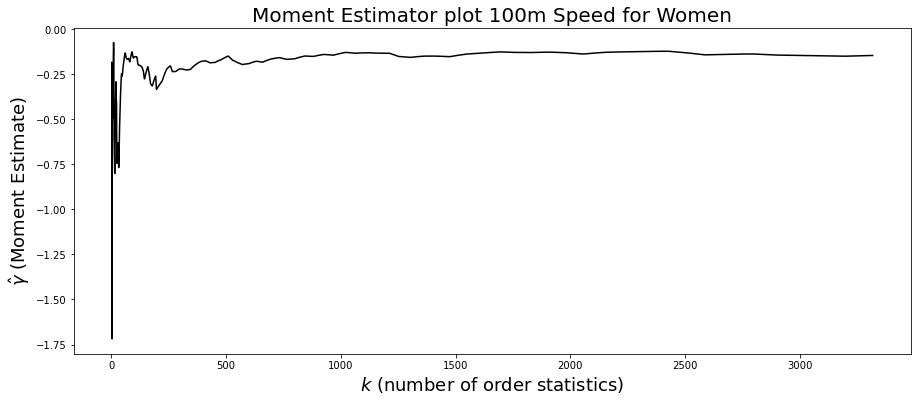

In [6]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), moment_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Moment Estimate)", fontsize=18)
plt.title(f"Moment Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Moment_Estimator_{gender.title()}")
plt.show()

## Hill Estimator

In [7]:
def hill_estimator(k: int, X: np.array) -> float:
    """Calculates the hill estimator for a given sample size k"""
    return 1/k * sum([log(X[(n-1)-i]) - log(X[(n-1)-k]) for i in range(0, k)])

In [8]:
hill_estimators = [hill_estimator(k, X) for k in range(2, n)]

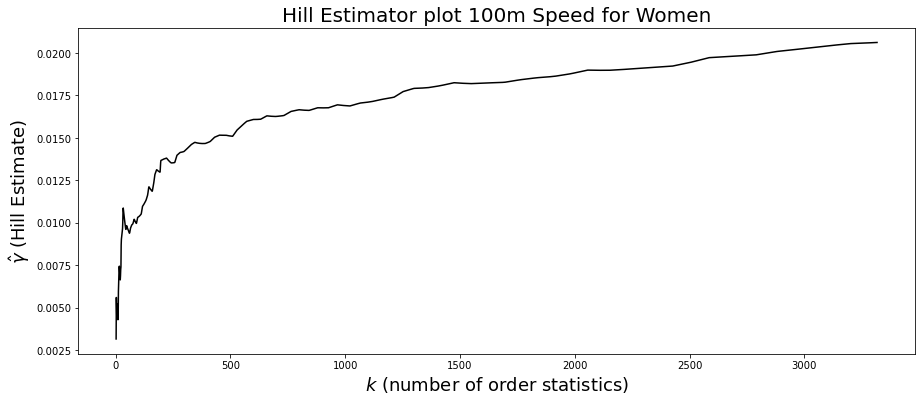

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(2,n), hill_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Hill Estimate)", fontsize=18)
plt.title(f"Hill Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Hill_Estimator_{gender.title()}")
plt.show()

## The Pickands Estimator

In [10]:
def pickands_estimator(k: int, X: np.array) -> float:
    """Calculates the Pickands Estimator for a given sample size k"""
    return 1/log(2) * log((X[(n-1)-k]-X[(n-1)-2*k])/(X[(n-1)-2*k]-X[(n-1)-4*k]))

In [11]:
pickands_estimators = [pickands_estimator(k, X) for k in range(1, int(n/4))]

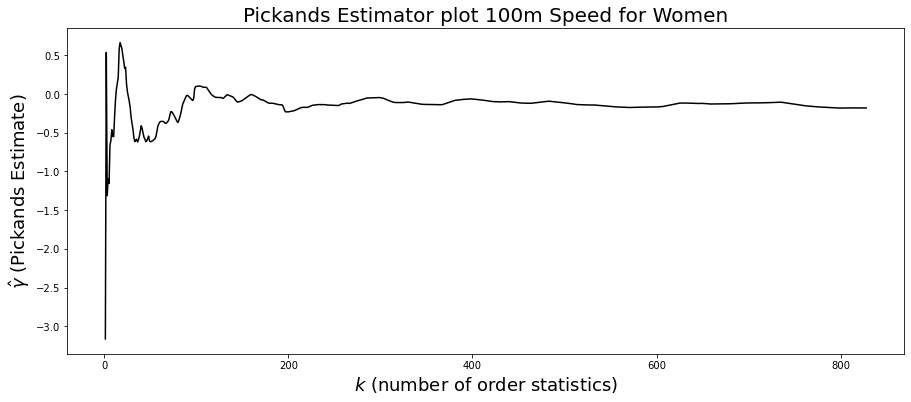

In [12]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1,int(n/4)), pickands_estimators, 'black')
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Pickands Estimate)", fontsize=18)
plt.title(f"Pickands Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/Pickands_Estimator_{gender.title()}")
plt.show()

## Combined Plot of Estimator

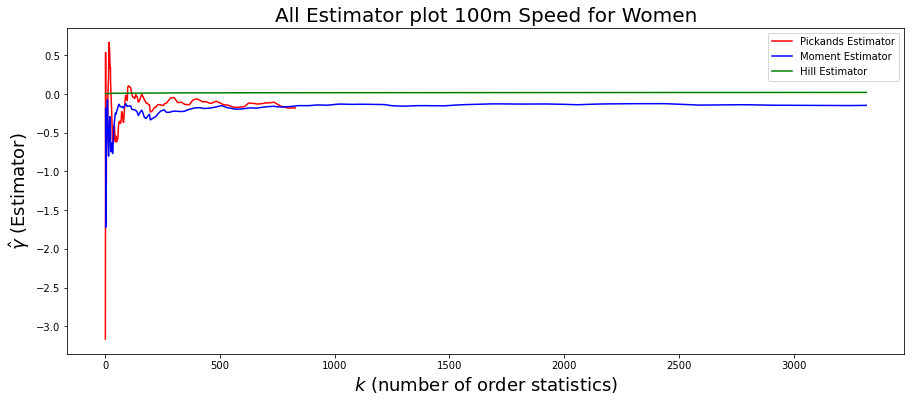

In [13]:
plt.figure(figsize=(15, 6))
plt.plot(np.arange(1,int(n/4)), pickands_estimators, 'red', label="Pickands Estimator")
plt.plot(np.arange(2,n), moment_estimators, 'blue', label="Moment Estimator")
plt.plot(np.arange(2,n), hill_estimators, 'green', label="Hill Estimator")
plt.legend(loc="best")
plt.xlabel("$k$ (number of order statistics)", fontsize=18)
plt.ylabel("$\hat{\gamma}$ (Estimator)", fontsize=18)
plt.title(f"All Estimator plot 100m Speed for {gender.title()}", fontsize=20)
plt.savefig(f"data/graphs/All_Estimator_{gender.title()}")
plt.show()